In [33]:
import pandas as pd

df= pd.read_csv('各鄉鎮市區人口密度.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   statistic_yyy       371 non-null    object
 1   site_id             375 non-null    object
 2   people_total        371 non-null    object
 3   area                371 non-null    object
 4   population_density  371 non-null    object
dtypes: object(5)
memory usage: 14.8+ KB


In [34]:
df1 =df.dropna()
df1.tail()
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   statistic_yyy       371 non-null    object
 1   site_id             371 non-null    object
 2   people_total        371 non-null    object
 3   area                371 non-null    object
 4   population_density  371 non-null    object
dtypes: object(5)
memory usage: 17.4+ KB


In [35]:
df1.head()

,statistic_yyy,site_id,people_total,area,population_density
0,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.317,23747
3,106,新北市中和區,413590,20.144,20532
4,106,新北市永和區,222585,5.7138,38956


In [36]:
df1.iloc[0]

statistic_yyy           統計年
site_id                 區域別
people_total          年底人口數
area                   土地面積
population_density     人口密度
Name: 0, dtype: object

In [37]:
df2= df1.rename(columns=df1.iloc[0].to_dict()) #選列
df2

,統計年,區域別,年底人口數,土地面積,人口密度
0,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.317,23747
3,106,新北市中和區,413590,20.144,20532
4,106,新北市永和區,222585,5.7138,38956
...,...,...,...,...,...
366,106,連江縣北竿鄉,2360,9.9,238
367,106,連江縣莒光鄉,1624,4.7,346
368,106,連江縣東引鄉,1352,3.8,356
369,106,東沙群島,…,2.38,…


### 更改 DataFrame 的欄位名稱
可以使用 `rename` 方法來更改 DataFrame 的欄位名稱。以下是範例代碼：
```python
# 假設我們有一個 DataFrame df
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
# 我們想將欄位 'A' 更改為 'Alpha'，'B' 更改為 'Beta'
df = df.rename(columns={'A': 'Alpha', 'B': 'Beta'})
print(df)
```
這樣就可以更改 DataFrame 的欄位名稱。

In [38]:
df3=df2.drop(index=0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 1 to 370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   統計年     370 non-null    object
 1   區域別     370 non-null    object
 2   年底人口數   370 non-null    object
 3   土地面積    370 non-null    object
 4   人口密度    370 non-null    object
dtypes: object(5)
memory usage: 17.3+ KB


In [39]:
import numpy as np
def str_to_int(value:str)-> int: #轉成整數
    return value
df3['年底人口數'].map(str)

1      551480
2      387484
3      413590
4      222585
5      416524
        ...  
366      2360
367      1624
368      1352
369        … 
370        … 
Name: 年底人口數, Length: 370, dtype: object

In [41]:
import numpy as np
def str_to_int(value:str) -> int:
    try:
        value_int = int(value)
    except:
        value_int = 0
    return value_int

def str_to_float(value:str) -> float:
   try:
        value_float = float(value)
   except:
        value_float = 0
   return value_float

df3['年底人口數'] = df3['年底人口數'].map(str_to_int)
df3['人口密度'] = df3['人口密度'].map(str_to_int)
df3['土地面積'] = df3['土地面積'].map(str_to_float)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 1 to 370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   統計年     370 non-null    object 
 1   區域別     370 non-null    object 
 2   年底人口數   370 non-null    int64  
 3   土地面積    370 non-null    float64
 4   人口密度    370 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 17.3+ KB


In [43]:
df3

,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.3170,23747
3,106,新北市中和區,413590,20.1440,20532
4,106,新北市永和區,222585,5.7138,38956
5,106,新北市新莊區,416524,19.7383,21102
...,...,...,...,...,...
366,106,連江縣北竿鄉,2360,9.9000,238
367,106,連江縣莒光鄉,1624,4.7000,346
368,106,連江縣東引鄉,1352,3.8000,356
369,106,東沙群島,0,2.3800,0


In [45]:
def split(value:str) -> str: #字串
    if len (value)>4:
        return value[:3] #傳出前三個字
    else: 
        return value
df3['縣市']=df3['區域別'].map(split)

In [46]:
df3

,統計年,區域別,年底人口數,土地面積,人口密度,縣市
1,106,新北市板橋區,551480,23.1373,23835,新北市
2,106,新北市三重區,387484,16.3170,23747,新北市
3,106,新北市中和區,413590,20.1440,20532,新北市
4,106,新北市永和區,222585,5.7138,38956,新北市
5,106,新北市新莊區,416524,19.7383,21102,新北市
...,...,...,...,...,...,...
366,106,連江縣北竿鄉,2360,9.9000,238,連江縣
367,106,連江縣莒光鄉,1624,4.7000,346,連江縣
368,106,連江縣東引鄉,1352,3.8000,356,連江縣
369,106,東沙群島,0,2.3800,0,東沙群島


In [48]:
df4=df3.reindex(columns=['縣市','區域別','年底人口數','土地面積','人口密度'])
df4

,縣市,區域別,年底人口數,土地面積,人口密度
1,新北市,新北市板橋區,551480,23.1373,23835
2,新北市,新北市三重區,387484,16.3170,23747
3,新北市,新北市中和區,413590,20.1440,20532
4,新北市,新北市永和區,222585,5.7138,38956
5,新北市,新北市新莊區,416524,19.7383,21102
...,...,...,...,...,...
366,連江縣,連江縣北竿鄉,2360,9.9000,238
367,連江縣,連江縣莒光鄉,1624,4.7000,346
368,連江縣,連江縣東引鄉,1352,3.8000,356
369,東沙群島,東沙群島,0,2.3800,0


In [57]:
def population(value:int)-> str:
    if value>367653:
        return'人多'
    elif value >183826:
        return'適中'
    else:
        return '人少'
df4['人口分佈']=df4['年底人口數'].map(population)
df4

,縣市,區域別,年底人口數,土地面積,人口密度,人口分佈
1,新北市,新北市板橋區,551480,23.1373,23835,人多
2,新北市,新北市三重區,387484,16.3170,23747,人多
3,新北市,新北市中和區,413590,20.1440,20532,人多
4,新北市,新北市永和區,222585,5.7138,38956,適中
5,新北市,新北市新莊區,416524,19.7383,21102,人多
...,...,...,...,...,...,...
366,連江縣,連江縣北竿鄉,2360,9.9000,238,人少
367,連江縣,連江縣莒光鄉,1624,4.7000,346,人少
368,連江縣,連江縣東引鄉,1352,3.8000,356,人少
369,東沙群島,東沙群島,0,2.3800,0,人少


In [52]:
pd.cut(df4['年底人口數'],bins=3)


1        (367653.333, 551480.0]
2        (367653.333, 551480.0]
3        (367653.333, 551480.0]
4      (183826.667, 367653.333]
5        (367653.333, 551480.0]
                 ...           
366       (-551.48, 183826.667]
367       (-551.48, 183826.667]
368       (-551.48, 183826.667]
369       (-551.48, 183826.667]
370       (-551.48, 183826.667]
Name: 年底人口數, Length: 370, dtype: category
Categories (3, interval[float64, right]): [(-551.48, 183826.667] < (183826.667, 367653.333] < (367653.333, 551480.0]]

In [58]:
! pip install seaborn

In [58]:
! pip install seaborn

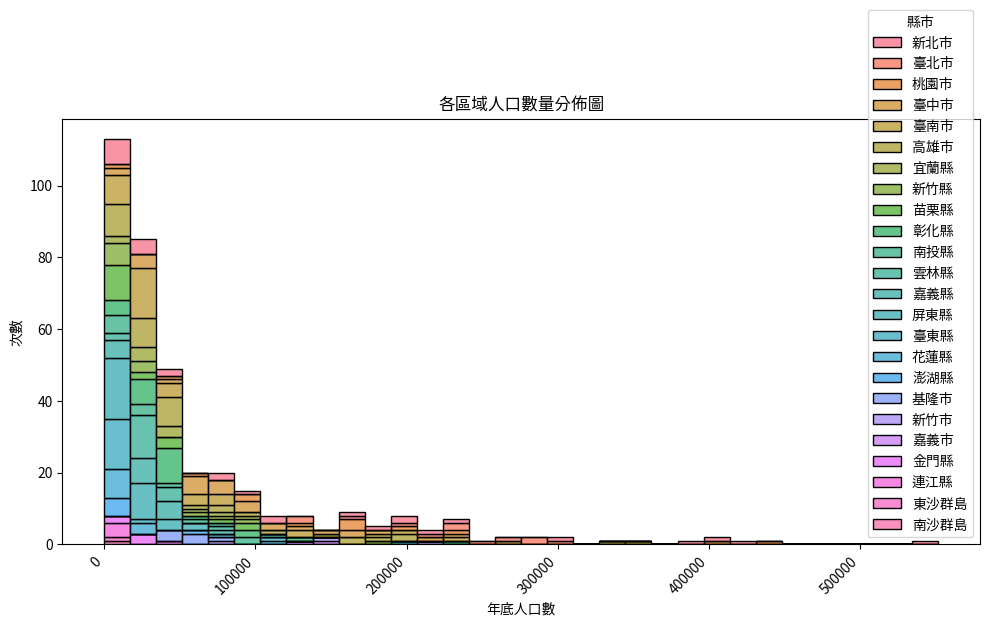

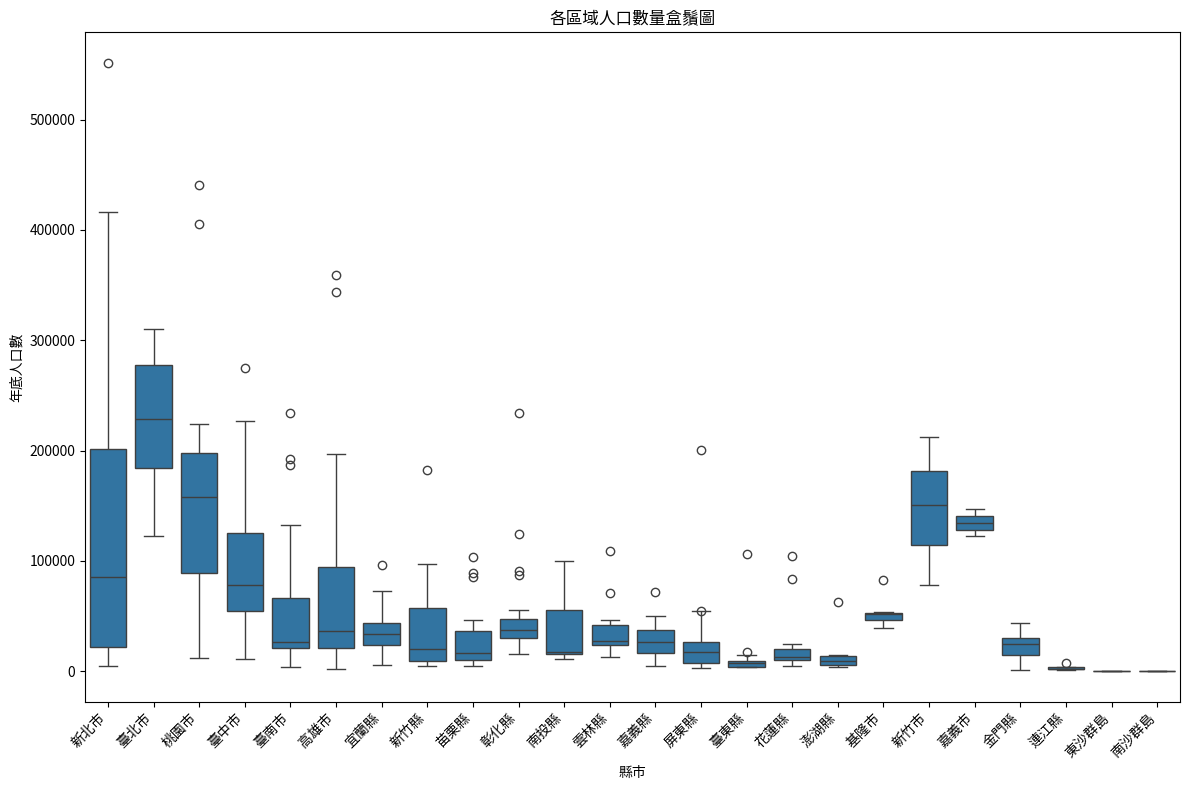

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')


df_plot = df4[['縣市','年底人口數']]

# 建立每個區域的人口分佈圖
plt.figure(figsize=(10, 6))
sns.histplot(data=df_plot, x='年底人口數', hue='縣市', multiple='stack',kde=False)
plt.xlabel('年底人口數')
plt.ylabel('次數')
plt.title('各區域人口數量分佈圖')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# 建立每個區域的人口盒鬚圖
plt.figure(figsize=(12, 8))
sns.boxplot(x='縣市', y='年底人口數', data=df4)
plt.xlabel('縣市')
plt.ylabel('年底人口數')
plt.title('各區域人口數量盒鬚圖')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()